# Image Resize

to (416, 416, 3)

In [11]:
# 라이브러리
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [12]:
def ratio_multiply(num, ratio=1):
    return int(num*ratio)

# bounding box 좌표 변경하기
def cvt_coordinate(center_x, center_y, w, h, ratio=1):
    '''
    start_x, start_y: 시작 꼭짓점 좌표 (x, y)
    end_x, end_y: 종료 꼭짓점 좌표 (x, y)
    ratio: resize 비율
    '''
    start_x, end_x = center_x - (w//2), center_x + (w//2)
    start_y, end_y = center_y - (h//2), center_y + (h//2)
    
    start_x = ratio_multiply(start_x, ratio)
    start_y = ratio_multiply(start_y, ratio) 
    end_x = ratio_multiply(end_x, ratio)
    end_y = ratio_multiply(end_y, ratio)
    
    return str(start_x), str(start_y), str(end_x), str(end_y)

def make_image(idx):
    img = cv2.imread(img_list[idx])
    df = pd.read_csv(txt_list[idx])
    ratio = 0.07

    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

    # bounding box
    for i in range(6):
        sr = df.iloc[i]
        center_x, center_y, w, h = sr[1], sr[2], sr[3], sr[4]
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
    #     print(start_x, start_y, end_x, end_y)
        resized_img = cv2.rectangle(resized_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 3)

    print("shape:", resized_img.shape)

    plt.imshow(resized_img)
    plt.show()

In [3]:
# data path 설정
DATA_PATH = '../data/'
data_list = os.listdir(DATA_PATH)

# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    if data == 'img' or data == 'train_annotation.txt':
        pass
    else:
        data = DATA_PATH + data
        if data.endswith('txt'):
            txt_list.append(data)
        else:
            img_list.append(data)

txt_list.sort()
img_list.sort()

print(len(img_list), len(txt_list))

2322 2322


(7581, 3019, 3)


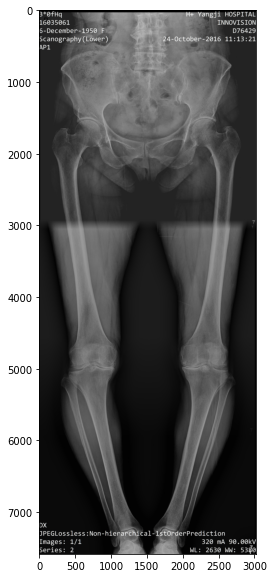

In [5]:
# cv2로 이미지 읽기
img = cv2.imread(img_list[0])
print(img.shape)
# plt로 이미지 읽기
plt.imshow(img)
plt.show()

In [31]:
f = open('../data/resized_train_annotation.txt', 'w')
n = len(txt_list)
anno_len = 6
ratio = 0.1

for i in range(n):
    # image
    img = cv2.imread(img_list[idx])
    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    
    # annotation
    data = []
    
    title = txt_list[i].split('/')[-1]
    cv2.imwrite('../data/img/'+ title[:-3] + 'jpg', resized_img)  # Save img
    title = './data/img/' + title[:-3] + 'jpg'
    
    df = pd.read_csv(txt_list[i])    
    for j in range(anno_len):
        val = df.iloc[j].tolist()
        center_x, center_y, w, h = val[1], val[2], val[3], val[4]
#         start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h)
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
        coordinate = [start_x, start_y, end_x, end_y, str(val[0])]        
        data.extend(coordinate)
        
    res = ','.join(data)    
    res = title + ' ' + res + '\n'
    f.write(res)
f.close()
print("Save Annotation txt")

Save Annotation txt


# 정리

## Image Resize and data annotation

In [13]:
# path 설정
'''
val or train or test
'''
DATA_PATH = '../data/org_test/'
file_path = '../data/test_annotation.txt'
title_path = './data/test/'
img_save_path = '../data/test/'

data_list = os.listdir(DATA_PATH)
print(len(data_list))

# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    data = DATA_PATH + data
    if data.endswith('txt'):
        txt_list.append(data)
    else:
        img_list.append(data)

txt_list.sort()
img_list.sort()

print(len(img_list), len(txt_list))

f = open(file_path, 'w')
n = len(txt_list)
anno_len = 6
ratio = 0.1

for i in range(n):
    # image
    img = cv2.imread(img_list[i])
    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
    
    # annotation
    data = []
    
    title = txt_list[i].split('/')[-1]
    cv2.imwrite(img_save_path+ title[:-3] + 'jpg', resized_img)  # Save img
    title = title_path + title[:-3] + 'jpg'
    
    df = pd.read_csv(txt_list[i])    
    for j in range(anno_len):
        val = df.iloc[j].tolist()
        center_x, center_y, w, h = val[1], val[2], val[3], val[4]
#         start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h)
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
        coordinate = [start_x, start_y, end_x, end_y, str(val[0])]        
        data.extend(coordinate)
        
    res = ','.join(data)    
    res = title + ' ' + res + '\n'
    f.write(res)
f.close()
print("Save Annotation txt")

458
229 229
Save Annotation txt


# Version 2

이미지를 resize 하면서 좌우에 padding을 주기

In [125]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"]=10, 10

In [126]:
train_data_path = '../data/train/'

train_data_lst = os.listdir(train_data_path)

print(len(train_data_lst))

1625


In [127]:
# txt data
train_txt_path = '../data/train_annotation.txt'

df = pd.read_csv(train_txt_path, header=None)

df['title'] = df[0].str.split(' ').str[0]

df[0] = df[0].str.split(' ').str[1]

df = df.astype({0:'int64'})

print('shape:', df.shape)
df.head()

shape: (1625, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,title
0,8,143,98,233,1,198,141,288,231,2,...,700,148,754,5,155,699,211,755,6,./data/train/5820554de4b0ced31a7fd174.jpg
1,34,189,116,271,1,183,183,265,265,2,...,705,151,755,5,154,707,204,757,6,./data/train/58205570e4b0bb347e7dec70.jpg
2,0,129,96,227,1,182,131,272,221,2,...,740,136,798,5,142,741,196,795,6,./data/train/582055c0e4b0ced31a7fd17e.jpg
3,41,130,117,206,1,206,124,288,206,2,...,675,154,723,5,166,672,214,720,6,./data/train/582055fbe4b0ced31a7fd180.jpg
4,31,118,119,206,1,193,117,277,201,2,...,678,158,726,5,163,680,211,728,6,./data/train/58205636e4b0ced31a7fd182.jpg


In [128]:
# 이미지 path를 넣으면 target_size 크기로 resize 해주는 함수
def resizing_img(img_path, target_size = 416):
    org_img = cv2.imread(img_path)
    org_img_shape = org_img.shape[:2]

    ratio = float(target_size) / max(org_img_shape)

    resize_size = tuple([int(x*ratio) for x in org_img_shape])

    resized_img = cv2.resize(org_img, (resize_size[1], resize_size[0]))

    delta_w = target_size - resize_size[1]
    delta_h = target_size - resize_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    # show img
    print(img.shape)
    plt.imshow(img)
    plt.show()
    
    return img

(416, 416, 3)


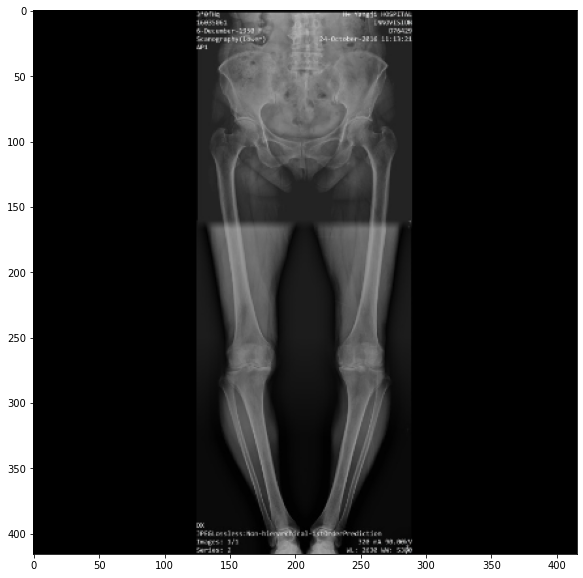

In [129]:
# n = len(train_data_lst)
n = 1
for i in range(n):
    img_path = train_data_path + train_data_lst[i]
    
    img = resizing_img(img_path)
        
    path = '../data/resized_train/' + img_path.split('/')[-1]
    
#     cv2.imwrite(path, img)

# Version 3

이미지 resize 중 좌표도 같이 변경해야하는데 식을 만들어서 계산하기 너무 귀찮다.

이전에 사용해본 라이브러리를 이용해서 간단하게 preprocessing을 해보자!

라이브러리

**albumentations**

In [149]:
import albumentations as A

In [150]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import albumentations as A

plt.rcParams["figure.figsize"]=10, 10

# image
train_data_path = '../data/train/'

train_data_lst = os.listdir(train_data_path)

print(len(train_data_lst))

# txt data
train_txt_path = '../data/train_annotation.txt'

df = pd.read_csv(train_txt_path, header=None)

df['title'] = df[0].str.split(' ').str[0]

df[0] = df[0].str.split(' ').str[1]

df = df.astype({0:'int64'})

print('shape:', df.shape)
df.head()

1625
shape: (1625, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,title
0,8,143,98,233,1,198,141,288,231,2,...,700,148,754,5,155,699,211,755,6,./data/train/5820554de4b0ced31a7fd174.jpg
1,34,189,116,271,1,183,183,265,265,2,...,705,151,755,5,154,707,204,757,6,./data/train/58205570e4b0bb347e7dec70.jpg
2,0,129,96,227,1,182,131,272,221,2,...,740,136,798,5,142,741,196,795,6,./data/train/582055c0e4b0ced31a7fd17e.jpg
3,41,130,117,206,1,206,124,288,206,2,...,675,154,723,5,166,672,214,720,6,./data/train/582055fbe4b0ced31a7fd180.jpg
4,31,118,119,206,1,193,117,277,201,2,...,678,158,726,5,163,680,211,728,6,./data/train/58205636e4b0ced31a7fd182.jpg


In [151]:
# 좌표값을 리스트로 변환
sr = df.iloc[0].tolist()
bboxes = []
for i in range(0, 29, 5):
    box = []
    box = sr[i:i+4]
    box += str(sr[i+4])
    
    bboxes.append(box)
    
print(bboxes)

[[8, 143, 98, 233, '1'], [198, 141, 288, 231, '2'], [24, 451, 114, 541, '3'], [188, 451, 278, 541, '4'], [94, 700, 148, 754, '5'], [155, 699, 211, 755, '6']]


In [152]:
path = train_data_path + train_data_lst[0]
path

image = cv2.imread(path)
image.shape

(758, 302, 3)

In [153]:
transform = A.Compose([
    A.LongestMaxSize(max_size=416, always_apply=True),
    A.PadIfNeeded(416, 416, always_apply=True, border_mode=0, value=[0, 0, 0]) 
    ],
    bbox_params = A.BboxParams(format='pascal_voc')
)

In [154]:
data = transform(image=image, bboxes=bboxes)

print(data['image'].shape)

(416, 416, 3)


shape: (416, 416, 3)


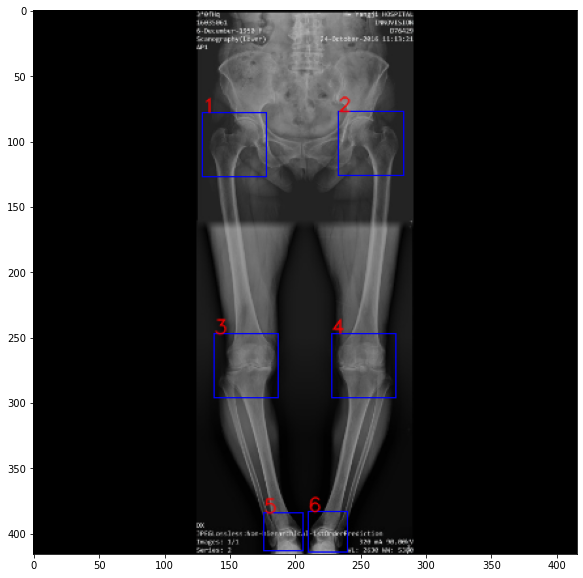

In [155]:
# show image with bbox and labels
img = data['image']
bboxes = data['bboxes']

# bounding box
for i in range(6):
    coor = bboxes[i]
    
    img = cv2.rectangle(img, (int(coor[0]), int(coor[1])), (int(coor[2]), int(coor[3])), (0, 0, 255), 1)
    cv2.putText(img, coor[4], (int(coor[0]), int(coor[1])), cv2.FONT_ITALIC, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

print("shape:", img.shape)
    
plt.imshow(img)
plt.show()